# P4 2/2
## Exercici 1
Explica quines comandes de Linux Pots fer servir a l’hora d’analitzar logs escrits a fitxer per a:
- Veure contínuament els logs que es van escrivint a un arxiu

tail -f /ruta/a/teu/arxiu.log

Aquesta comanda mostrarà les últimes línies de l'arxiu i, a mesura que es vagi afegint nova informació, es mostrarà automàticament al terminal. És útil per a seguir logs en temps real mentre es produeixen noves escriptures.

- Cercar una paraula concreta dintre d’un arxiu de log

grep "error" /ruta/a/teu/arxiu.log

Per cercar una paraula o una cadena de text dins d'un fitxer de log, pots fer servir la comanda grep. Aquesta comanda busca una cadena de text dins d'un fitxer i mostra les línies que la contenen. 

## Exercici 2
El concepte logging és molt important en la programació, alhora que està estrictament relacionat amb el tema que estem treballant. Un log en el nostre àmbit vindria a ser un fitxer que conté dades relacionades amb els principals esdeveniments i successos que ocorren en un programa o en un sistema operatiu, així doncs, ja sigui per saber en quin punt hem tingut un error, perquè l'execució del programa no ha anat bé, o quina sèrie de passes ha seguit una persona mentre utilitzava la nostra aplicació i moltes altres utilitats, els Logs són vitals al món del software.

1. En aquest exercici recuperarem el bucle d’exemple que vam fer servir a les sessions de teoria, i configurarem el log per què  els misstatges d’error (isuperiors) vagin a un arxiu, i els missatges d’info (i superiors) vagin a un altre arxiu, mentre que tots els missatges es mostren a la vegada per pantalla. A més, afegirem un nou missatge d’info a l’aplicació  pel que farem servir un logger especial i diferent del que ja hem fet servir, i que tindrà un manegador amb format csv.  Fes commit al repositori cada vegada que tinguis resolt i funcionant una d’aquestes coses:
    - logs d’info a fitxer de logs d’info i logs d’error a fitxer de logs d’error
    - Afegir, a mes del handler de fitxer per a fitxers info, un handler de pantalla amb nivell info
    - Afegir un nou logger amb un nou manegador i un nou formatador a CSV, i afegir una línia al programa que generi aquests logs
    - Pujar al repositori una mostra d’unes 20 linies dels fitxers de logs generats per la vostra aplicació: un d’info, un d’error, i un en format CSV

In [2]:
import logging
import logging.config
import time
import csv

# Configuració del log
logging.config.fileConfig('logging.conf')

# Logger per als missatges d'error i d'informació
logger = logging.getLogger('ExempleFichero')

# Logger per als logs en CSV
csv_logger = logging.getLogger('CSVLogger')

# Configuració del nou logger per CSV
csv_handler = logging.FileHandler('log_csv.csv', mode='a')
csv_formatter = logging.Formatter('%(asctime)s,%(name)s,%(levelname)s,%(message)s')
csv_handler.setFormatter(csv_formatter)
csv_logger.addHandler(csv_handler)
csv_logger.setLevel(logging.INFO)

# Mentre l'aplicació estigui en execució
while True:
    logger.debug('Debug message cada dos segons')
    logger.info('Info message cada dos segons')
    logger.error('Error message cada dos segons')

    # Afegir un log en format CSV
    csv_logger.info('Info message en CSV')

    time.sleep(2)  # Pausa de 2 segons


2024-11-26 19:41:59 - ExempleFichero - INFO - Info message cada dos segons
2024-11-26 19:41:59 - ExempleFichero - ERROR - Error message cada dos segons
2024-11-26 19:41:59 - CSVLogger - INFO - Info message en CSV
2024-11-26 19:42:01 - ExempleFichero - INFO - Info message cada dos segons
2024-11-26 19:42:01 - ExempleFichero - ERROR - Error message cada dos segons
2024-11-26 19:42:01 - CSVLogger - INFO - Info message en CSV
2024-11-26 19:42:03 - ExempleFichero - INFO - Info message cada dos segons
2024-11-26 19:42:03 - ExempleFichero - ERROR - Error message cada dos segons
2024-11-26 19:42:03 - CSVLogger - INFO - Info message en CSV
2024-11-26 19:42:05 - ExempleFichero - INFO - Info message cada dos segons
2024-11-26 19:42:05 - ExempleFichero - ERROR - Error message cada dos segons
2024-11-26 19:42:05 - CSVLogger - INFO - Info message en CSV
2024-11-26 19:42:07 - ExempleFichero - INFO - Info message cada dos segons
2024-11-26 19:42:07 - ExempleFichero - ERROR - Error message cada dos seg

KeyboardInterrupt: 

2. Que creieu que és millor mostrar els logs per exemple a la terminal durant l'execució del programa o bolcar-los en un fitxer de text?

   Em decantaria per bolcar els logs en un fitxer de text.
   Raons per triar aquesta opció:

   Persistència i anàlisi futura: Els logs en un fitxer ofereixen la possibilitat de conservar la informació després que el programa acabi la seva execució. Això és
   essencial per a auditories, diagnòstics posteriors o fins i tot per depurar problemes que es presentin en un entorn de producció.

   Flexibilitat per processar els logs: Pots utilitzar eines com grep, awk o fins i tot scripts personalitzats per analitzar els fitxers de log, cercar patrons o
   generar informes, el que fa que la gestió de logs sigui més potent a llarg termini.
   Tot i que veure els logs en la terminal és útil a curt termini, el fet de tenir els logs emmagatzemats en un fitxer et permet conservar-los per a qualsevol
   necessitat futura, cosa que és fonamental per a la seguretat i el manteniment de l'aplicació.

3. Omple la següent taula amb expmple, avantantges, i desavantatges de les següents maneres de fer logs:

**Comparativa de maneres de fer logs amb el mòdul `logging`**

| Mètode                                                 | Exemple                                                                                                                                                 | Avantatges                                                                                                                                                                                                                       | Desavantatges                                                                                                                                                                                                                 |
|--------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fent servir la configuració per defecte del mòdul logging** | ```python<br>import logging<br>logging.warning("Això és un missatge de warning.")<br>``` | - No requereix configuració addicional, fàcil d'usar.<br>- Adequat per scripts petits o ràpides proves.<br>- Sortida estàndard fàcil de veure. | - No permet configuracions avançades (fitxers, formats, nivells específics, etc.).<br>- Menys flexible en entorns de producció.<br>- No escala bé per aplicacions grans. |
| **instanciant un objecte logger i parametritzat-lo des de programa** | ```python<br>import logging<br>logger = logging.getLogger('exemple')<br>handler = logging.StreamHandler()<br>formatter = logging.Formatter('%(message)s')<br>handler.setFormatter(formatter)<br>logger.addHandler(handler)<br>logger.setLevel(logging.DEBUG)<br>logger.info("Missatge d'informació.")<br>``` | - Totalment personalitzable des del codi (nivell, format, destinació).<br>- No depèn de fitxers externs.<br>- Útil per entorns dinàmics o sense accés a fitxers de configuració. | - Pot resultar en codi més llarg i menys net.<br>- La configuració està incrustada al codi, la qual cosa dificulta canvis ràpids o proves amb altres configuracions. |
| **instanciant un objecte logger a partir d’una configuració emmagatzemada a fitxer** | **Configuració al fitxer** `logging.conf`:<br>```ini<br>[loggers]<br>keys=root,exemple<br>[handlers]<br>keys=fileHandler<br>[formatters]<br>keys=simpleFormatter<br>[logger_root]<br>level=DEBUG<br>[handler_fileHandler]<br>class=FileHandler<br>args=('example.log', 'a')<br>formatter=simpleFormatter<br>[formatter_simpleFormatter]<br>format=%(asctime)s - %(message)s<br>```<br>**Codi Python:**<br>```python<br>import logging.config<br>logging.config.fileConfig('logging.conf')<br>logger = logging.getLogger('exemple')<br>logger.debug("Missatge de depuració.")<br>``` | - Permet guardar configuracions complexes (nivells, formats, múltiples handlers) fora del codi.<br>- Fàcil de mantenir i reutilitzar en diversos projectes.<br>- Configuració clara i centralitzada, adequada per a aplicacions grans. | - Requereix accés al fitxer de configuració durant l'execució.<br>- Pot ser menys intuïtiu per a principiants.<br>- Depura errors de configuració pot ser més difícil que amb configuracions directes al codi. |


4. Cerca llibreries de logs en altres llenguatjes (al menys 2, i identifica cóm resolen les següents característiques típiques d’un sistema de logging.  Omple la següent taula, i inclou-la al read-me del repositori:

**Comparativa de Biblioteques de Logging en Diferents Llenguatges**

| Característica                         | Llenguatge 1 (Java)          | Llenguatge 2 (JavaScript)      |
|---------------------------------------|-----------------------------|--------------------------------|
| **Llenguatge**                        | Java                        | JavaScript                    |
| **Nom de la biblioteca**              | Log4j                       | Winston                       |
| **És nativa del llenguatge?**         | No, però àmpliament utilitzada | No, però molt popular        |
| **URL per descarregar-se la biblioteca** | [Log4j](https://logging.apache.org/log4j/2.x/) | [Winston](https://www.npmjs.com/package/winston) |
| **Inicialització de l’objecte de logger** | Configuració amb XML, JSON o programació directa | Creació amb `createLogger` i transports definits |
| **Nivells de log disponibles**        | Trace, Debug, Info, Warn, Error, Fatal | Error, Warn, Info, HTTP, Verbose, Debug, Silly |
| **Mètode per fer log**                | `logger.info("message");`, `logger.error("message");` | `logger.info("message");`, `logger.error("message");` |
| **Tipus de manegadors**               | Consola, fitxer, bases de dades, serveis remots | Consola, fitxer, serveis externs com AWS o Graylog |
| **Opcions de format**                 | Format personalitzable amb plantilles i patrons | JSON, text simple o formats personalitzats |


**Observacions:**
1. **Log4j (Java)**: És extremadament flexible i potent, permetent configuracions avançades mitjançant fitxers externs. És ideal per a aplicacions grans que requereixen gestió avançada de registres.
2. **Winston (JavaScript)**: Fàcil d'utilitzar i configurar, especialment per a aplicacions web o basades en Node.js. Ofereix integració amb serveis de *cloud* i eines de monitorització modernes.


## Exercici 3

Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació que permetés a un treballador de forma senzilla introduir mitjançant un fitxer json, txt csv o similar introduir unes dades que escollim i li elaborem una sèrie de gràfiques.

Abans d’això, caldrà informar-se sobre les següents eines, alguna de les quals potser ja coneixeu.
- Pandas
- Jupyter Notebook
- reportlab

La idea d'aquest punt és detallar,
<!-- - La funcionalitat de cada una de les eines presentades. -->
- Caldrà posar captures de les proves que heu fet i argumentar quines eines i llibreries utilitzareu finalment.


1. Pandas

    **Funcionalitat**:
   - Pandas és una llibreria de Python utilitzada per a la manipulació i anàlisi de dades.
   - Permet treballar amb dades estructurades en formats com taules (DataFrames).

    **Proves realitzades:**
   - Hem carregat el fitxer circuits.csv i hem analitzat-ne les columnes i registres.
   - Exemples:

In [4]:
import pandas as pd
data = pd.read_csv('circuits.csv')
print(data.head())  # Mostra les primeres línies del DataFrame
print(data.info())  # Informació sobre columnes i tipus de dades


   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

**Avantatges**

- Facilita el tractament de dades estructurades.
- Suporta formats com CSV, Excel, JSON, SQL, entre d'altres.

**Desaventatges:**

- Pot ser ineficient amb datasets molt grans sense optimització.

2. Jupyter Notebook

**Funcionalitat:**
- Entorn interactiu per a l'execució de codi Python.
- Ideal per prototipar projectes, visualitzar gràfiques i documentar anàlisis.

**Proves realitzades:**
- S'ha utilitzat per desenvolupar el codi de manipulació de dades amb Pandas i visualitzacions amb Matplotlib i Seaborn.
- Exemples:
  - Mostrar dades carregades amb Pandas.
  - Visualitzar gràfiques generades per Matplotlib directament al notebook.

**Avantatges:**
- Permet combinar codi, visualitzacions i documentació en un sol document.
- Facilita la reproducció i compartició d'anàlisis.

**Desaventatges**
- No és ideal per a aplicacions en producció.

3. ReportLab
**Funcionalitat:**
- Llibreria de Python per a la generació de documents PDF.
- Permet inserir text, imatges i gràfiques de manera programàtica.

**Proves realitzades**
- Creació d'un informe amb les gràfiques generades (imatges de circuits per país i distribució d'altitud).
- Example:

In [ ]:
from reportlab.pdfgen import canvas
c = canvas.Canvas("example.pdf")
c.drawString(100, 750, "Informe Exemple")
c.drawImage("grafica.png", 50, 500, width=500, height=250)
c.save()

**Avantatges**
- Totalment personalitzable.
- Útil per crear informes automatitzats.

**Desavantatges:**
- Requereix més codi manual que altres eines per formatar.

## Conclusió
**Eines seleccionades:**
- **Pandas**: Per processar les dades.
- **Jupyter Notebook**: Per desenvolupar i prototipar el codi.
- **ReportLab**: Per generar informes en PDF.

/tmp/ipykernel_515/2041956122.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


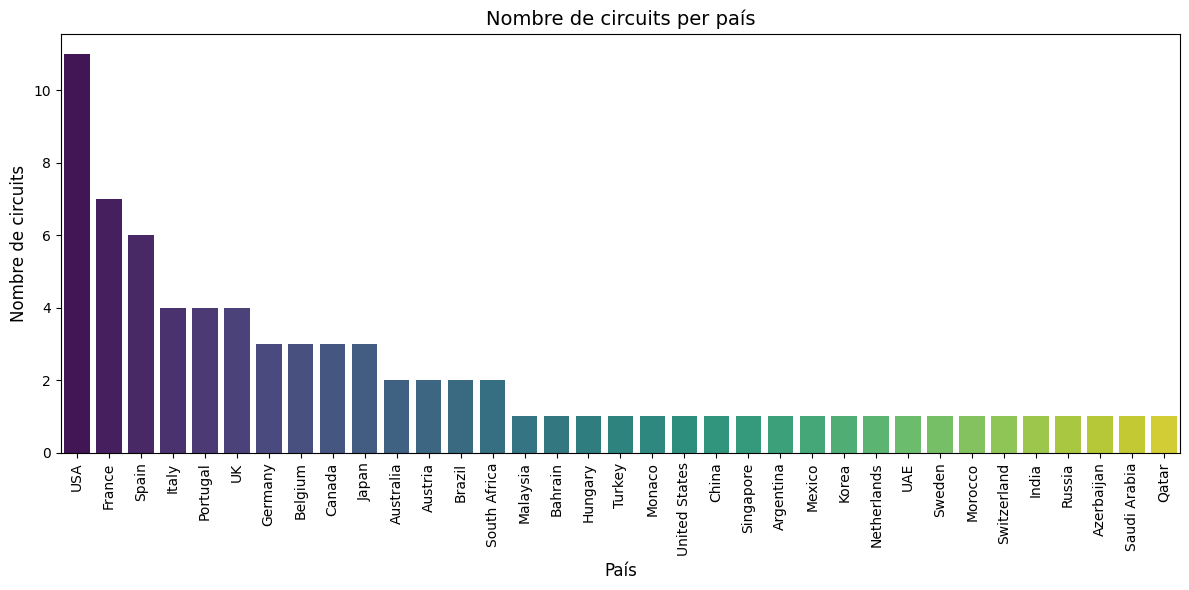

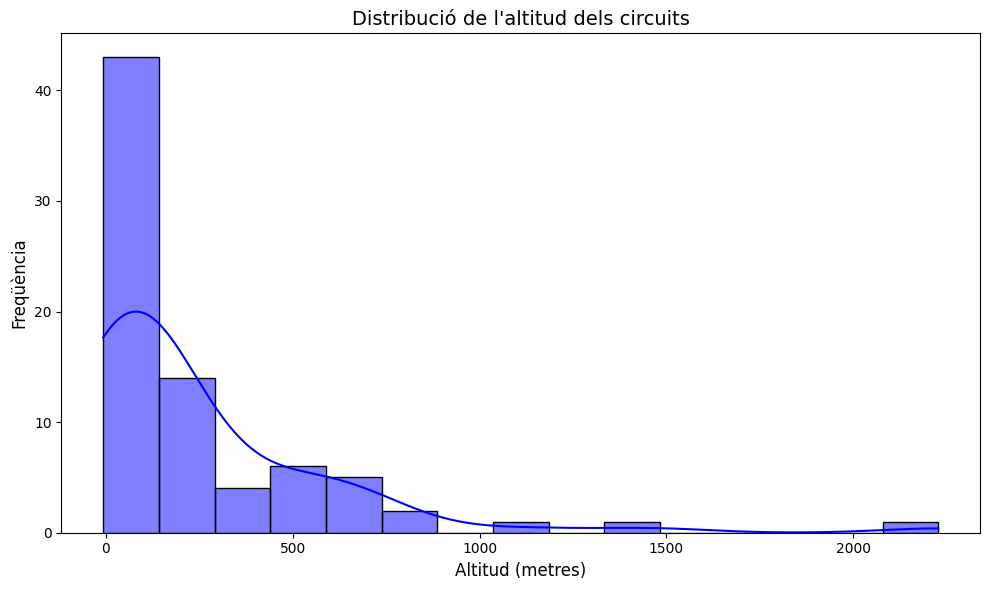

Informe PDF generat: informe_circuits.pdf


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

# Llegir el fitxer CSV
file_path = 'circuits.csv'
data = pd.read_csv(file_path)

# Gràfic 1: Nombre de circuits per país
plt.figure(figsize=(12, 6))
country_counts = data['country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Nombre de circuits per país", fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Nombre de circuits", fontsize=12)
plt.tight_layout()
plt.savefig("circuits_per_pais.png")
plt.show()

# Gràfic 2: Distribució de l'altitud dels circuits
plt.figure(figsize=(10, 6))
sns.histplot(data['alt'], kde=True, color="blue", bins=15)
plt.title("Distribució de l'altitud dels circuits", fontsize=14)
plt.xlabel("Altitud (metres)", fontsize=12)
plt.ylabel("Freqüència", fontsize=12)
plt.tight_layout()
plt.savefig("distribucio_altitud.png")
plt.show()

# Crear l'informe PDF
pdf_path = "informe_circuits.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)
width, height = letter

# Títol de l'informe
c.setFont("Helvetica-Bold", 16)
c.drawString(100, height - 50, "Informe de Circuits de Curses")

# Resum del dataset
c.setFont("Helvetica", 12)
c.drawString(50, height - 100, f"Total de circuits: {len(data)}")
c.drawString(50, height - 120, f"Països representats: {data['country'].nunique()}")

# Afegir la primera gràfica
c.drawString(50, height - 160, "Nombre de circuits per país:")
c.drawImage("circuits_per_pais.png", 50, height - 450, width=500, height=250)

# Afegir la segona gràfica
c.drawString(50, height - 480, "Distribució de l'altitud dels circuits:")
c.drawImage("distribucio_altitud.png", 50, height - 750, width=500, height=250)

# Guardar i tancar el PDF
c.save()

print(f"Informe PDF generat: {pdf_path}")


## Exercici 4
En aquest exercici caldrà generar per exemple un CSV amb les dades que treballareu. RECORDAR que el CSV treballa amb comes.
Un cop generat el CSV, caldrà bolcar les dades al JUPYTER i comprovar que es mostren correctament.


In [3]:
import pandas as pd

# Crear les dades d'exemple amb 20 persones
data = {
    'Professor': ['Emili', 'Mario', 'Steven', 'Albert', 'Carla', 'Joan', 'Rosa', 'Pere', 'Anna', 'Marc', 'Paula', 'Jordi', 'Eva', 'Clara', 'Marta', 'Luís', 'Isabel', 'Ricard', 'Laura', 'Xavi'],
    'Alumne': ['Xavier', 'Marc', 'Jaume', 'Laura', 'Santi', 'David', 'Adrià', 'Pablo', 'Carla', 'Judit', 'Miguel', 'Ramon', 'Toni', 'Aina', 'Sílvia', 'Roger', 'Marta', 'Toni', 'Albert', 'Susana'],
    'M01': [7, 10, 8, 6, 7, 9, 5, 8, 9, 6, 8, 7, 6, 5, 9, 8, 5, 6, 7, 9],
    'M04': [9, 3, 5, 8, 6, 7, 8, 6, 7, 6, 9, 8, 5, 7, 8, 7, 8, 6, 9, 7],
    'M03': [5, 5, 6, 7, 8, 6, 5, 9, 7, 6, 7, 6, 8, 5, 7, 9, 8, 7, 6, 5],
    'M05': [8, 8, 4, 7, 9, 8, 6, 5, 6, 9, 7, 9, 7, 8, 6, 6, 5, 6, 7, 8]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame en un fitxer CSV
df.to_csv('dades_persones.csv', index=False)

print("CSV creat amb èxit!")

# Carregar el fitxer CSV
df_loaded = pd.read_csv('dades_persones.csv')

# Mostrar les primeres files per verificar el contingut
print(df_loaded)

CSV creat amb èxit!
   Professor  Alumne  M01  M04  M03  M05
0      Emili  Xavier    7    9    5    8
1      Mario    Marc   10    3    5    8
2     Steven   Jaume    8    5    6    4
3     Albert   Laura    6    8    7    7
4      Carla   Santi    7    6    8    9
5       Joan   David    9    7    6    8
6       Rosa   Adrià    5    8    5    6
7       Pere   Pablo    8    6    9    5
8       Anna   Carla    9    7    7    6
9       Marc   Judit    6    6    6    9
10     Paula  Miguel    8    9    7    7
11     Jordi   Ramon    7    8    6    9
12       Eva    Toni    6    5    8    7
13     Clara    Aina    5    7    5    8
14     Marta  Sílvia    9    8    7    6
15      Luís   Roger    8    7    9    6
16    Isabel   Marta    5    8    8    5
17    Ricard    Toni    6    6    7    6
18     Laura  Albert    7    9    6    7
19      Xavi  Susana    9    7    5    8


## Exercici 5

Un cop tractades les dades introduïdes via fitxer caldrà investigar la llibreria que hagueu triat i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l'àmbit del problema una sèrie de dades transformades obtingudes corresponents a, (s’haurà de adequar a les vostres dades però per a que tingueu algun exemple).

Ex.
- La mitjana de nota final de cada alumne
- La mitjana de nota final de tots els alumnes en conjunts.
- Percentatges d'aprovats i suspesos
- Notes més baixes o més altes.
- Algun altre que creieu interessant.

Com a restricció caldrà com a mínim generar cinc resultats coherents amb un procés d’avaluació.

In [4]:
import pandas as pd

# Carregar el CSV creat anteriorment
df = pd.read_csv('dades_persones.csv')

# Afegir una columna de mitjana de les notes de cada alumne
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# Resultat 1: Mitjana de nota final de cada alumne
print("Mitjana de nota final de cada alumne:")
print(df[['Professor', 'Alumne', 'Mitjana']])

# Resultat 2: Mitjana de nota final de tots els alumnes
mitjana_total = df['Mitjana'].mean()
print("\nMitjana de nota final de tots els alumnes:")
print(mitjana_total)

# Resultat 3: Percentatge d'aprovats i suspesos (suposem que la nota mínima per aprovar és 5)
aprovats = df[df['Mitjana'] >= 5].shape[0]
suspesos = df[df['Mitjana'] < 5].shape[0]
total = df.shape[0]

percentatge_aprovats = (aprovats / total) * 100
percentatge_suspesos = (suspesos / total) * 100

print("\nPercentatge d'aprovats i suspesos:")
print(f"Aprovats: {percentatge_aprovats:.2f}%")
print(f"Sospesos: {percentatge_suspesos:.2f}%")

# Resultat 4: Notes més baixes (menys de 5) i més altes (més de 8)
notes_baixes = df[df['Mitjana'] < 5]
notes_altes = df[df['Mitjana'] > 8]

print("\nNotes més baixes (menys de 5):")
print(notes_baixes[['Professor', 'Alumne', 'Mitjana']])

print("\nNotes més altes (més de 8):")
print(notes_altes[['Professor', 'Alumne', 'Mitjana']])

# Resultat 5: Com a resultat extra, podem obtenir la mitjana per cada professor
mitjana_per_professor = df.groupby('Professor')['Mitjana'].mean()

print("\nMitjana de nota final per cada professor:")
print(mitjana_per_professor)


Mitjana de nota final de cada alumne:
   Professor  Alumne  Mitjana
0      Emili  Xavier     7.25
1      Mario    Marc     6.50
2     Steven   Jaume     5.75
3     Albert   Laura     7.00
4      Carla   Santi     7.50
5       Joan   David     7.50
6       Rosa   Adrià     6.00
7       Pere   Pablo     7.00
8       Anna   Carla     7.25
9       Marc   Judit     6.75
10     Paula  Miguel     7.75
11     Jordi   Ramon     7.50
12       Eva    Toni     6.50
13     Clara    Aina     6.25
14     Marta  Sílvia     7.50
15      Luís   Roger     7.50
16    Isabel   Marta     6.50
17    Ricard    Toni     6.25
18     Laura  Albert     7.25
19      Xavi  Susana     7.25

Mitjana de nota final de tots els alumnes:
6.9375

Percentatge d'aprovats i suspesos:
Aprovats: 100.00%
Sospesos: 0.00%

Notes més baixes (menys de 5):
Empty DataFrame
Columns: [Professor, Alumne, Mitjana]
Index: []

Notes més altes (més de 8):
Empty DataFrame
Columns: [Professor, Alumne, Mitjana]
Index: []

Mitjana de nota final

## Exercici 6
De la mateixa manera que a l'exercici 5 caldrà investigar una llibreria per a realitzar gràfics de dades visuals i elaborar com a mínim el codi necessari per presentar de forma que tinguin sentit amb l'àmbit del problema.

Com a restricció caldrà com a mínim generar 4 gràfiques coherents.

Es pot utilitzar la llibreria python matploit

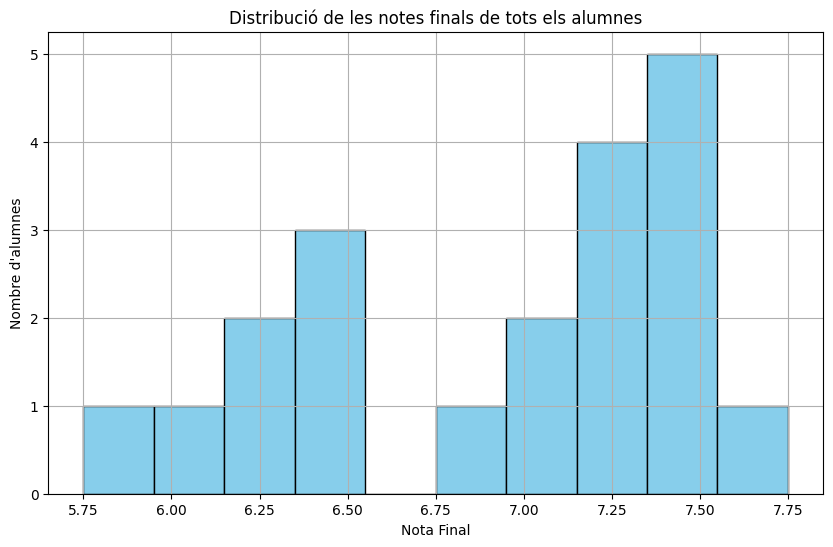

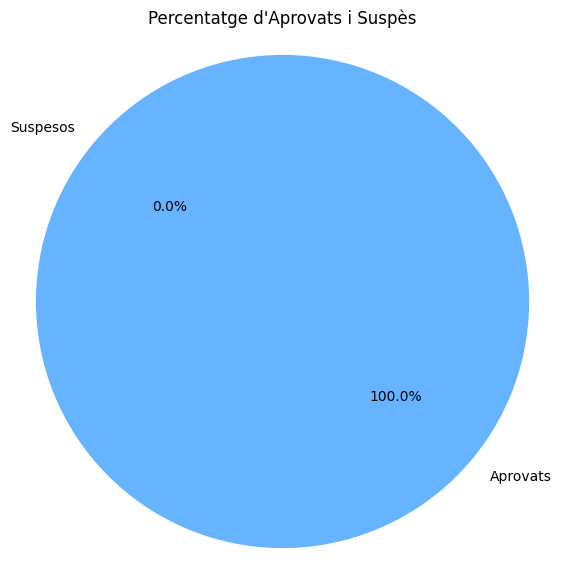

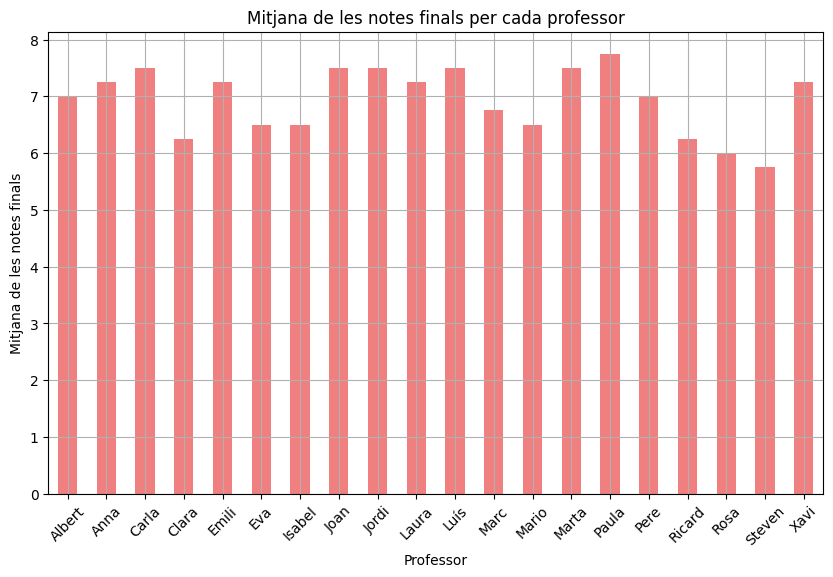

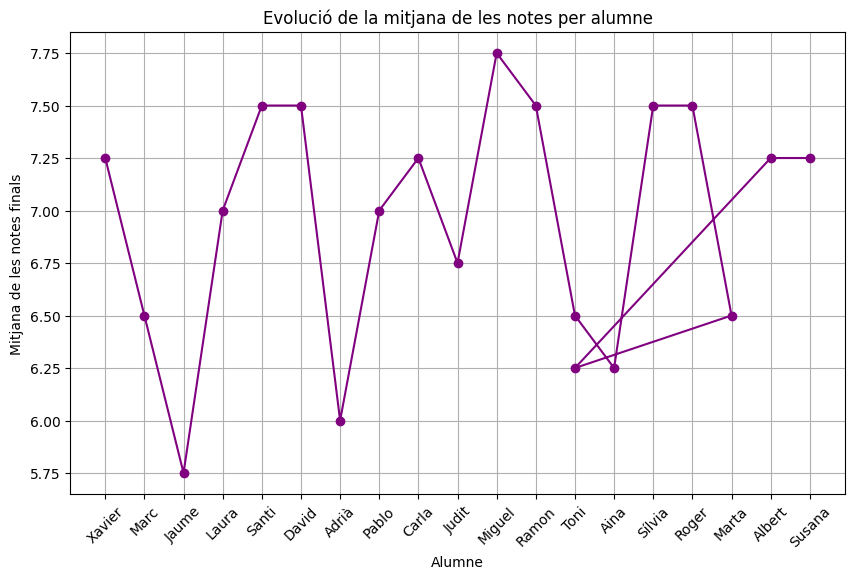

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar el fitxer CSV
df = pd.read_csv('dades_persones.csv')

# Afegir la columna de mitjana de les notes
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# Gràfic 1: Histograma de les mitjanes de les notes finals
plt.figure(figsize=(10, 6))
plt.hist(df['Mitjana'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribució de les notes finals de tots els alumnes')
plt.xlabel('Nota Final')
plt.ylabel('Nombre d\'alumnes')
plt.grid(True)
plt.show()

# Gràfic 2: Percentatge d'aprovats i suspesos
aprovats = df[df['Mitjana'] >= 5].shape[0]
suspesos = df[df['Mitjana'] < 5].shape[0]

labels = ['Aprovats', 'Suspesos']
sizes = [aprovats, suspesos]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentatge d\'Aprovats i Suspès')
plt.axis('equal')  # Assegura que el gràfic sigui circular
plt.show()

# Gràfic 3: Gràfic de barres de les mitjanes per cada professor
mitjana_per_professor = df.groupby('Professor')['Mitjana'].mean()

plt.figure(figsize=(10, 6))
mitjana_per_professor.plot(kind='bar', color='lightcoral')
plt.title('Mitjana de les notes finals per cada professor')
plt.xlabel('Professor')
plt.ylabel('Mitjana de les notes finals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gràfic 4: Gràfic de línia que mostra la mitjana de les notes per alumne
plt.figure(figsize=(10, 6))
plt.plot(df['Alumne'], df['Mitjana'], marker='o', linestyle='-', color='purple')
plt.title('Evolució de la mitjana de les notes per alumne')
plt.xlabel('Alumne')
plt.ylabel('Mitjana de les notes finals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Exercici 7

Caldrà fer un informe de les següents parts de la pràctica 5.
1. Un informe de la part de logging amb el codi que s’ha utilitzat i els exemples d’utilització i resultats.

L'objectiu d'aquesta secció és configurar un sistema de logging per enregistrar els missatges de l'aplicació en diferents formats, com ara fitxers de text (logs d'errors i informació) i CSV. Aquest procés ens ajuda a fer un seguiment de l'execució de l'aplicació i detectar possibles problemes o comportaments anòmals.

Codi de Configuració de Logging:

In [ ]:
import logging
import logging.config
import time
import csv

# Configuració del log
logging.config.fileConfig('logging.conf')

# Logger per als missatges d'error i d'informació
logger = logging.getLogger('ExempleFichero')

# Logger per als logs en CSV
csv_logger = logging.getLogger('CSVLogger')

# Configuració del nou logger per CSV
csv_handler = logging.FileHandler('log_csv.csv', mode='a')
csv_formatter = logging.Formatter('%(asctime)s,%(name)s,%(levelname)s,%(message)s')
csv_handler.setFormatter(csv_formatter)
csv_logger.addHandler(csv_handler)
csv_logger.setLevel(logging.INFO)

# Mentre l'aplicació estigui en execució
while True:
    logger.debug('Debug message cada dos segons')
    logger.info('Info message cada dos segons')
    logger.error('Error message cada dos segons')

    # Afegir un log en format CSV
    csv_logger.info('Info message en CSV')

    time.sleep(2)  # Pausa de 2 segons


**Explicacio del Codi:**
1. **Imports:**
    - S'han importat els mòduls logging per gestionar els missatges de registre, logging.config per configurar els loggers a partir de fitxers, time per afegir pauses i csv per gestionar l'escriptura de logs en format CSV.
2. **Configuració Inicial:**
   - **logging.config.fileConfig** s'utilitza per carregar la configuració de logging des d'un fitxer logging.conf.
   - Es creen dos loggers:
     - logger: per gestionar els missatges d'error i d'informació.
     - csv_logger: per enregistrar els missatges en un fitxer CSV.
3. **Loggers i Handlers:**
   - Es configura un handler de fitxer per guardar els logs en el fitxer log_csv.csv amb un format de registre CSV, especificat pel formatter % (asctime)s,%(name)s,%(levelname)s,%(message)s.
   - Es defineixen dos tipus de logs: un per guardar-se com a logs tradicionals (txt o altres formats) i un altre per generar logs en format CSV.
4. **Cicle Principal:**
   - En un bucle infinit (per simular l'execució d'una aplicació real), el logger genera tres tipus de missatges: debug, info, i error cada 2 segons.
   - A més, es genera un log en format CSV amb el missatge d'informació.

2. Un informe de la part del tractament de dades, que s’expliqui cada part que s’ha utilitzat així com les gràfiques que es mostren.

En aquesta secció, el nostre objectiu és tractar les dades d'un conjunt d'alumnes, que inclou les notes de diferents matèries, per realitzar càlculs estadístics i generar gràfics que ajuden a visualitzar la informació. Per a això, utilitzarem la llibreria Pandas i Matplotlib per processar les dades i crear visualitzacions.

**Codi per al Tractament de Dades:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Llegir el fitxer CSV
df = pd.read_csv('dades_persones.csv')

# Afegir la columna de mitjana de les notes
df['Mitjana'] = df[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# Gràfic 1: Histograma de les mitjanes de les notes finals
plt.figure(figsize=(10, 6))
plt.hist(df['Mitjana'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribució de les notes finals de tots els alumnes')
plt.xlabel('Nota Final')
plt.ylabel('Nombre d\'alumnes')
plt.grid(True)
plt.show()

# Gràfic 2: Percentatge d'aprovats i suspesos
aprovats = df[df['Mitjana'] >= 5].shape[0]
suspesos = df[df['Mitjana'] < 5].shape[0]

labels = ['Aprovats', 'Suspesos']
sizes = [aprovats, suspesos]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentatge d\'Aprovats i Suspès')
plt.axis('equal')  # Assegura que el gràfic sigui circular
plt.show()

# Gràfic 3: Gràfic de barres de les mitjanes per cada professor
mitjana_per_professor = df.groupby('Professor')['Mitjana'].mean()

plt.figure(figsize=(10, 6))
mitjana_per_professor.plot(kind='bar', color='lightcoral')
plt.title('Mitjana de les notes finals per cada professor')
plt.xlabel('Professor')
plt.ylabel('Mitjana de les notes finals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gràfic 4: Gràfic de línia que mostra la mitjana de les notes per alumne
plt.figure(figsize=(10, 6))
plt.plot(df['Alumne'], df['Mitjana'], marker='o', linestyle='-', color='purple')
plt.title('Evolució de la mitjana de les notes per alumne')
plt.xlabel('Alumne')
plt.ylabel('Mitjana de les notes finals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Explicació del Codi:**
1. **Lectura de Dades**: Utilitzem pandas per llegir les dades d'un fitxer CSV amb les notes dels alumnes i les seves identificacions.
2. **Càlcul de Mitjanes**: A cada alumne se li calcula la mitjana de les notes de les matèries, utilitzant la funció mean(axis=1).
3. **Generació de Gràfics**: Utilitzem Matplotlib per crear quatre tipus de gràfics:
   - **Histograma**: Per mostrar la distribució de les notes finals.
   - **Gràfic de sectors**: Per mostrar el percentatge d'aprovats i suspesos.
   - **Gràfic de barres**: Per comparar la mitjana de notes per professor.
   - **Gràfic de línies**: Per visualitzar les mitjanes de les notes per alumne.

**Resultats Esperats:**
1. **Histograma de Notes Finals**: Un gràfic que mostra la distribució de les notes finals dels alumnes, ajudant a identificar tendències.
2. **Gràfic de Percentatge d'Aprovats i Suspens**: Un gràfic de sectors (pie chart) que mostra la proporció d'aprovats i suspesos.
3. **Gràfic de Barres per Professor**: Un gràfic que compara les mitjanes de les notes finals per cada professor.
4. **Gràfic de Línies per Alumne**: Un gràfic de línies que mostra les mitjanes de notes per alumne.